# Agricultura - Estimaciones agrícolas

## Dataset

Repositorio de aprendizaje automático de UC Irvine

- [Estimaciones agrícolas](https://datos.gob.ar/dataset/agroindustria-agricultura---estimaciones-agricolas/archivo/agroindustria_95d066e6-8a0f-4a80-b59d-6f28f88eacd5)

## Contexto

Serie de estadística agrícola, por cultivo, campaña, provincia y partido/departamento de la República Argentina. Contiene los siguientes datos: superficie sembrada, superficie cosechada, producción y rendimiento. Las superficies se muestran en hectáreas, la producción en toneladas y el rendimiento en kg/ha. Los datos se actualizan semestralmente.

## Objetivo

## Requirements

execute the following command to install the required packages:

```bash
pip install -r requirements.txt
```

## Extracción de Datos


In [1]:
import pandas

# Leer el archivo CSV con los datos
data = pandas.read_csv('estimaciones-agricolas-2023-10.csv',  encoding='utf-8')

print(data.head())
print(data.info())
# print(data.dtypes())
print(data.shape)
print(data.tail())
# Muestra las primeras filas del DataFrame
print(data.head())
# Muestra información general del DataFrame
print(data.info())
# Obtiene el número de filas y columnas en el DataFrame
filas, columnas = data.shape
print(f'Número de filas: {filas}, Número de columnas: {columnas}')
# Obtiene los nombres de las columnas
print('Nombres de las columnas:', data.columns)

   id_provincia     provincia  id_departamento            departamento  \
0             6  Buenos Aires              854              25 de Mayo   
1             6  Buenos Aires               14  Adolfo Gonzales Chaves   
2             6  Buenos Aires               21                 Alberti   
3             6  Buenos Aires               28         Almirante Brown   
4             6  Buenos Aires               77               Arrecifes   

   id_cultivo cultivo  id_campana    campana  sup_sembrada sup_cosechada  \
0         1.0     Ajo           1  1969/1970             3             3   
1         1.0     Ajo           1  1969/1970            15            15   
2         1.0     Ajo           1  1969/1970             5             5   
3         1.0     Ajo           1  1969/1970             2             2   
4         1.0     Ajo           1  1969/1970             6             6   

  produccion rendimiento  
0         10        3333  
1         82        5467  
2          7     

/tmp/ipykernel_63518/939880430.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas
/tmp/ipykernel_63518/939880430.py:4: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pandas.read_csv('estimaciones-agricolas-2023-10.csv',  encoding='utf-8')


## Preparación y transformación de datos

In [57]:
# Elimino las columnas que no son de interés
sanitized = data.drop(columns=['id_provincia','id_departamento','id_cultivo'])

sanitized['year'] = sanitized['campana'].astype(str).str.split('/').str[0]
# Convertir las columnas 'sup_cosechada' y 'production' a tipo float
sanitized['sup_cosechada'] = pandas.to_numeric(sanitized['sup_cosechada'], errors='coerce')
sanitized['produccion'] = pandas.to_numeric(sanitized['produccion'], errors='coerce')

# Eliminar los cultivos que no son de interés
cultivos_a_eliminar = ['Soja 1ra', 'Soja 2da', 'Soja de 2da', 'Cebada cervecera', 'Cebada forrajera',
                      'Trigo candeal', 'Poroto alubia', 'Poroto negro', 'Poroto otros','Poroto seco']
sanitized = sanitized[~sanitized['cultivo'].isin(cultivos_a_eliminar)]

# reemplazo caracteres que no se pueden visualizar
sanitized['cultivo'] = sanitized['cultivo'].replace('Algod�n', 'Algodon', regex=True)
sanitized['cultivo'] = sanitized['cultivo'].replace('Ma�z', 'Maiz', regex=True)
sanitized['cultivo'] = sanitized['cultivo'].replace('T�', 'Te', regex=True)

# Reemplazo nombres
sanitized['cultivo'] = sanitized['cultivo'].replace('Soja total', 'Soja', regex=True)
sanitized['cultivo'] = sanitized['cultivo'].replace('Trigo total', 'Trigo', regex=True)
#  listado de los cultivos
cultivos = sanitized['cultivo'].unique()
print("\nCultivos:")
print(cultivos)

# Busco valores nulos
nulos = sanitized.isnull()
print("\nValores nulos por columna:")
print(nulos.sum())
# Eliminar las filas donde 'sup_cosechada' es nulo
sanitized = sanitized.dropna(subset=['sup_cosechada'])
sanitized = sanitized.dropna(subset=['produccion'])

print(sanitized.describe())


Cultivos:
['Ajo' 'Algodon' 'Alpiste' 'Arroz' 'Avena' 'Banana' 'Ca�a de az�car'
 'C�rtamo' 'Cebolla total' 'Centeno' 'Girasol' 'Lim�n' 'Lino' 'Maiz'
 'Mandarina' 'Man�' 'Mijo' 'Naranja' 'Papa total' 'Pomelo' 'Soja' 'Sorgo'
 'Te' 'Trigo' 'Tung' 'Yerba mate' 'Colza' 'Jojoba' 'Cebada total'
 'Poroto total' 'Arveja' 'Garbanzo' 'Lenteja']

Valores nulos por columna:
provincia         0
departamento      0
cultivo           0
id_campana        0
campana           0
sup_sembrada      0
sup_cosechada    13
produccion       14
rendimiento       0
year              0
dtype: int64
          id_campana  sup_sembrada  sup_cosechada    produccion
count  128997.000000  1.289970e+05   1.289970e+05  1.289970e+05
mean       23.091560  1.138301e+04   9.719883e+03  3.149914e+04
std        15.812235  3.344994e+04   3.172712e+04  1.255929e+05
min         1.000000  0.000000e+00   0.000000e+00  0.000000e+00
25%        10.000000  1.500000e+02   6.000000e+01  2.000000e+02
50%        19.000000  1.300000e+03   7.

## Exploración y visualización de datos

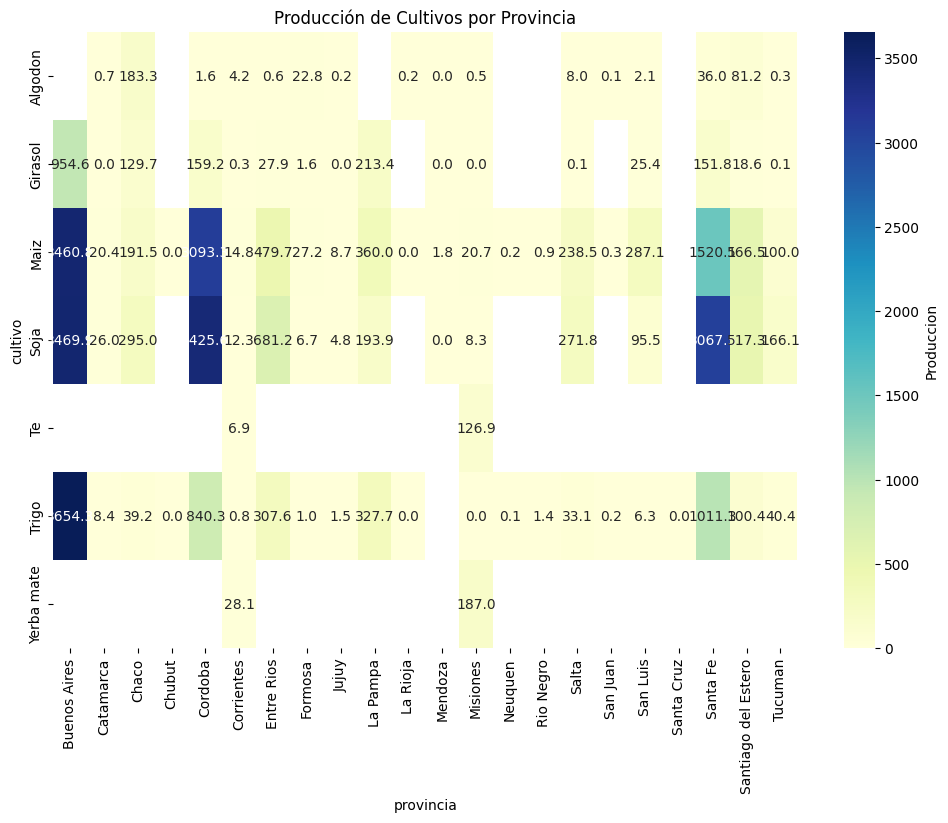

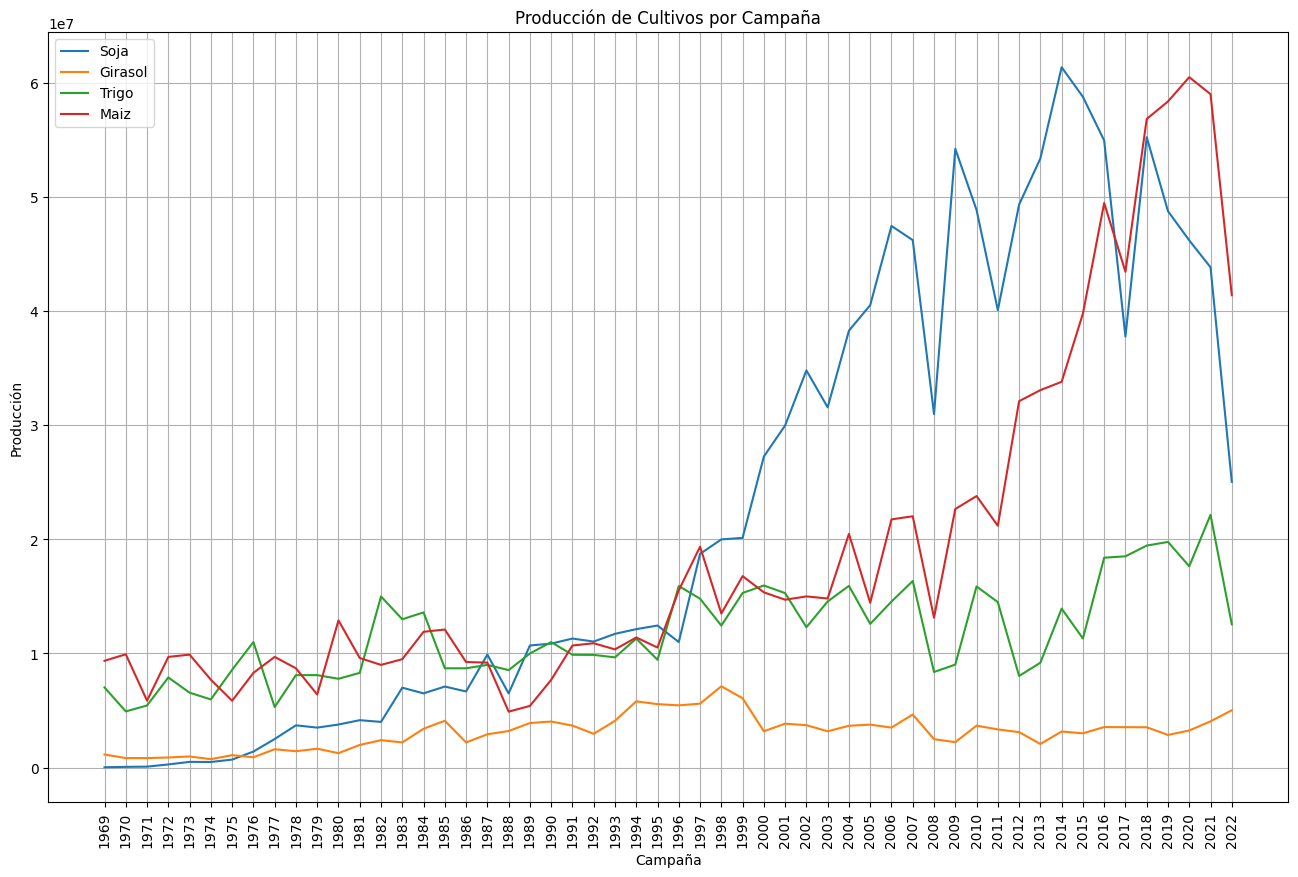

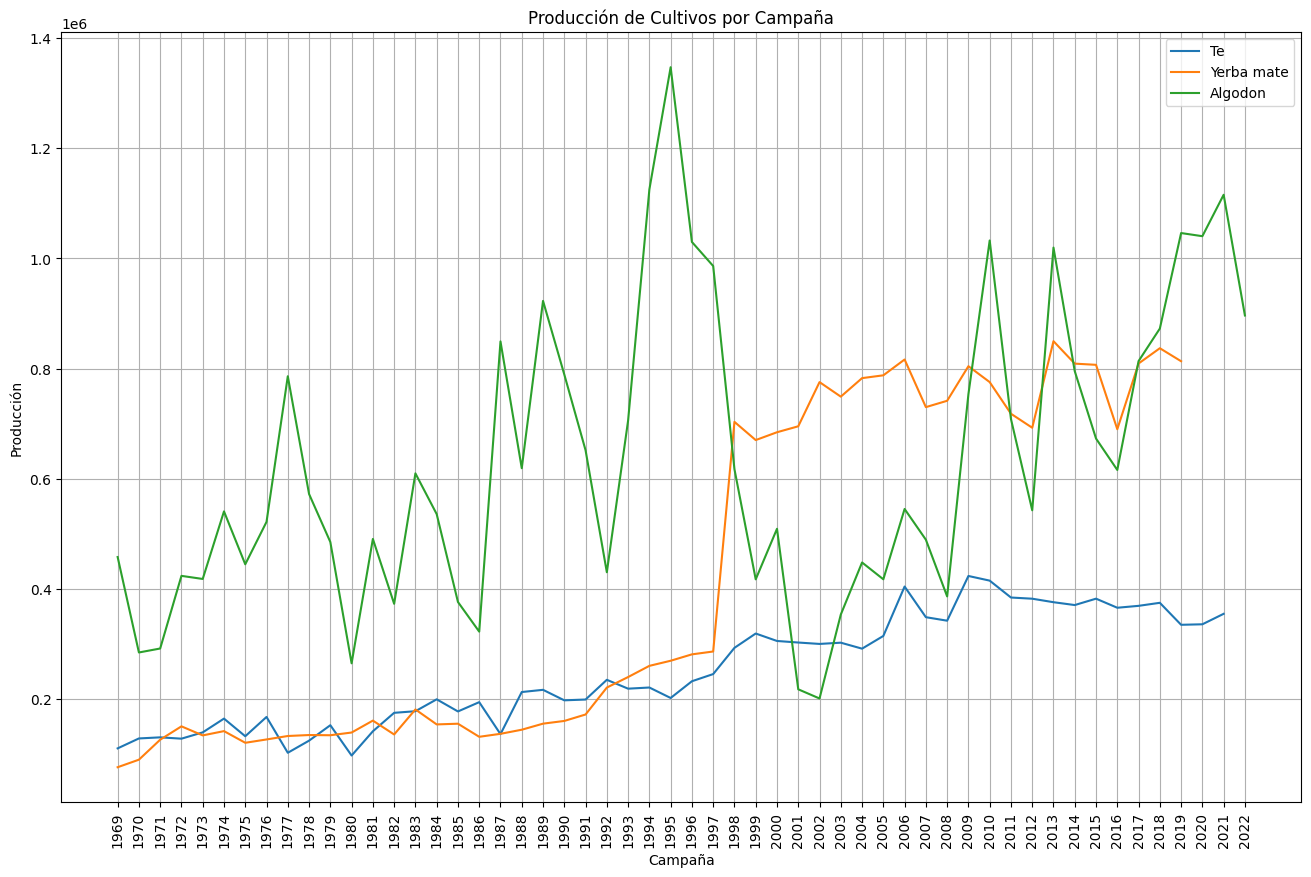

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

def cultivos_por_campana(data, cultivos):
    plt.figure(figsize=(16,10))
    for cultivo in cultivos:
        result_cultivo = data[data['cultivo'] == cultivo]
        plt.plot(result_cultivo['year'], result_cultivo['produccion'], label=cultivo)
    plt.xlabel('Campaña')
    plt.ylabel('Producción')
    plt.title('Producción de Cultivos por Campaña')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=90)

def cultivo_sup_produccion(data, cultivo):
    plt.figure(figsize=(16,10))
    result_cultivo = data[data['cultivo'] == cultivo]
    plt.plot(result_cultivo['year'], result_cultivo['sup_sembrada'], label='sembrado')
    plt.plot(result_cultivo['year'], result_cultivo['sup_cosechada'], label='cosechado')
    plt.plot(result_cultivo['year'], result_cultivo['produccion'], label='produccion')
    plt.xlabel('Campaña')
    plt.ylabel(cultivo)
    plt.title(cultivo+' por Campaña')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=90)

def cultivo_por_provincia(data, cultivos):
    filtrados = data[data['cultivo'].isin(cultivos)]
    result = filtrados.groupby(['cultivo', 'provincia'])['produccion'].sum().reset_index()
    result['produccion'] = result['produccion'] / 100000
    heatmap_data = result.pivot(index='cultivo', columns='provincia', values='produccion')
    # Gráfico de calor (heatmap)   
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Produccion'})
    plt.title('Producción de Cultivos por Provincia')
    plt.xlabel('provincia')
    plt.ylabel('cultivo')

result = sanitized.groupby(['year', 'cultivo']).agg({
    'sup_sembrada': 'sum',
    'sup_cosechada': 'sum',
    'produccion': 'sum'
}).reset_index()

cultivo_por_provincia(sanitized, ['Soja','Girasol','Trigo', 'Maiz','Te','Yerba mate','Algodon'])
cultivos_por_campana(result, ['Soja','Girasol','Trigo', 'Maiz'])
cultivos_por_campana(result, ['Te','Yerba mate','Algodon' ])

# Mostrar el gráfico
plt.show()

## Modelado y predicción

## Conclusiones